<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .prompt{
        display: None;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  
</style>
<script>
    MathJax.Hub.Config({
                        TeX: {
                           extensions: ["AMSmath.js"]
                           },
                tex2jax: {
                    inlineMath: [ ['$','$'], ["\\(","\\)"] ],
                    displayMath: [ ['$$','$$'], ["\\[","\\]"] ]
                },
                displayAlign: 'center', // Change this to 'center' to center equations.
                "HTML-CSS": {
                    styles: {'.MathJax_Display': {"margin": 4}}
                }
        });
</script>

# Lifelines examples
##### Divorce Rates

In [1]:
from lifelines.estimation import AalenAdditiveFitter
import pandas as pd
import numpy as np
import patsy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/camerondavidson-pilon/.virtualenvs/data/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [18]:
data = pd.read_csv('../lifelines/datasets/divorce.dat', sep="\s{2,10}")

/Users/camerondavidson-pilon/.virtualenvs/data/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [19]:
data.head(10)

,id,heduc,heblack,mixed,years,div
0,9,12-15 years,No,No,10.546,No
1,11,< 12 years,No,No,34.943,No
2,13,< 12 years,No,No,2.834,Yes
3,15,< 12 years,No,No,17.532,Yes
4,33,12-15 years,No,No,1.418,No
5,36,< 12 years,No,No,48.033,No
6,43,16+ years,No,No,16.706,No
7,47,< 12 years,No,No,24.999,No
8,50,< 12 years,No,No,24.999,No
9,56,< 12 years,Yes,No,3.869,No


In [20]:
df = patsy.dmatrix('heduc + heblack + heblack:mixed + years + mixed + div -1 ', data, return_type='dataframe')

In [21]:
df.head()

,heduc[12-15 years],heduc[16+ years],heduc[< 12 years],heblack[T.Yes],mixed[T.Yes],div[T.Yes],heblack[T.Yes]:mixed[T.Yes],years
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.546
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,34.943
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.834
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,17.532
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.418


## Aalen's Additive Model

In [24]:
aaf = AalenAdditiveFitter(fit_intercept=True, coef_penalizer=0.5)

In [25]:
timeline = np.linspace(0, 35, 1000)

In [26]:
aaf.fit(df, 'years', event_col='div[T.Yes]', timeline=timeline)

 [-----------------100%-----------------] 1032 of 1032 complete in 1.2 sec


<lifelines.AalenAdditiveFitter: fitted with 3371 observations, 2339 censored>

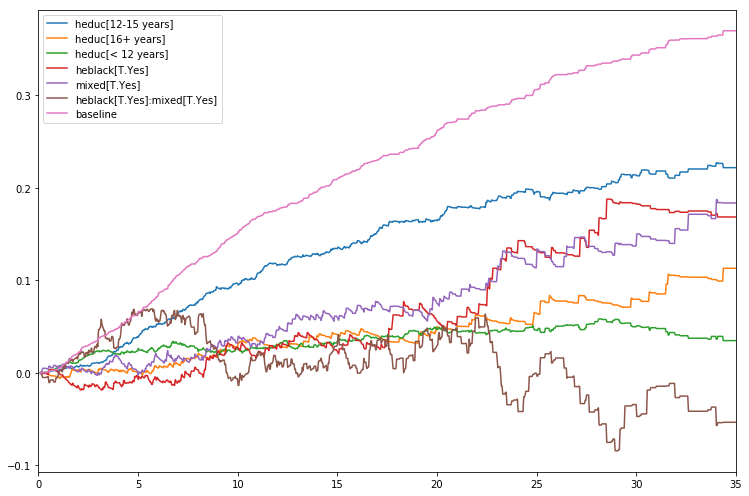

In [27]:
figsize(12.5, 8.5)
aaf.cumulative_hazards_.plot()
plt.legend(loc='upper left')


## Cox's Proportional Hazard Model

In [28]:
from lifelines import CoxPHFitter

In [37]:
cp = CoxPHFitter(penalizer=0.5)
cp.fit(df, 'years', event_col='div[T.Yes]')

<lifelines.CoxPHFitter: fitted with 3371 observations, 2339 censored>

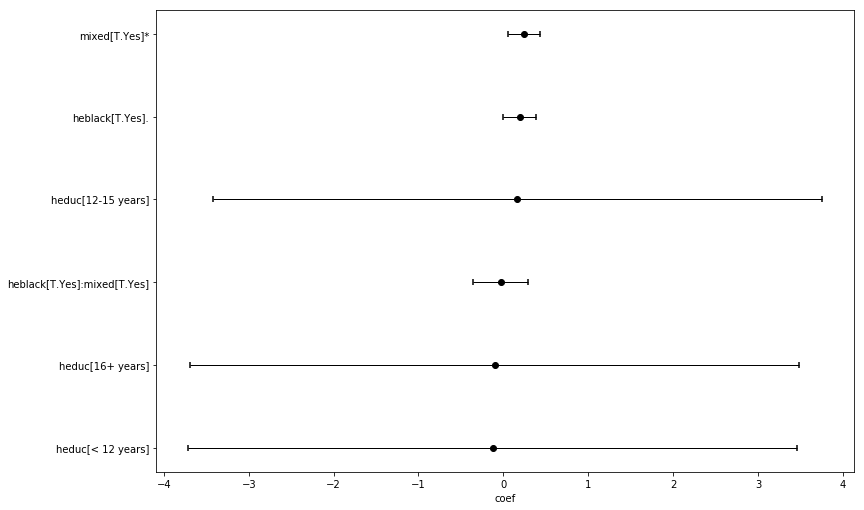

In [39]:
cp.plot()